# **Grounded SAM2 for building part recognition**

A small notebook for using Grounded SAM2 to export the segmentation of windows ona batched building file.

https://github.com/autodistill/autodistill-grounded-sam-2

---
##Installing grounded SAM2

Cloning the git and installing the dependecies

In [ ]:
!pip install git+https://github.com/autodistill/autodistill-grounded-sam-2 rf_groundingdino -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 65.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

In [ ]:
!pip install transformers==4.49

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 72.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.50.3
    Uninstalling transformers-4.50.3:
      Successfully uninstalled transformers-4.50.3


In [ ]:
!wget https://media.roboflow.com/containers.zip
!unzip containers.zip

--2025-04-12 13:52:46--  https://media.roboflow.com/containers.zip
Resolving media.roboflow.com (media.roboflow.com)... 34.110.133.209
Connecting to media.roboflow.com (media.roboflow.com)|34.110.133.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12356763 (12M) [application/zip]
Saving to: ‘containers.zip’

containers.zip      100%[===================>]  11.78M  41.2MB/s    in 0.3s    

2025-04-12 13:52:47 (41.2 MB/s) - ‘containers.zip’ saved [12356763/12356763]

Archive:  containers.zip
   creating: containers/
  inflating: containers/Tips-and-tricks-on-how-to-park-a-yard-jockey-_mp4-75_jpg.rf.ffbb8716eb886f91e3a561e2ba4be074.jpg  
  inflating: __MACOSX/containers/._Tips-and-tricks-on-how-to-park-a-yard-jockey-_mp4-75_jpg.rf.ffbb8716eb886f91e3a561e2ba4be074.jpg  
  inflating: containers/Tips-and-tricks-on-how-to-park-a-yard-jockey-_mp4-169_jpg.rf.c0bf90f4b4bf5450508f6ccd5fd85e79.jpg  
  inflating: __MACOSX/containers/._Tips-and-tricks-on-how-to-park-a-ya

---
## Importing the packages and testing SAM2

In [ ]:
from autodistill_grounded_sam_2 import GroundedSAM2

Importing from timm.models.layers is deprecated, please import via timm.layers


In [ ]:
from autodistill.detection import CaptionOntology
from autodistill.utils import plot
import numpy as np
import cv2
import os
import random
import supervision as sv

# define an ontology to map class names to our Grounded SAM 2 prompt
# the ontology dictionary has the format {caption: class}
# where caption is the prompt sent to the base model, and class is the label that will
# be saved for that caption in the generated annotations
# then, load the model
base_model = GroundedSAM2(
    ontology=CaptionOntology(
        {
            "shipping container": "container"
        }
    ),
    model = "Grounding DINO",
    grounding_dino_box_threshold=0.25
)

trying to load grounding dino directly
downloading dino model weights


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)


final text_encoder_type: bert-base-uncased



The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def show_black_white_image(np_array):
    import matplotlib.pyplot as plt
    plt.imshow(np_array, cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
base_model = GroundedSAM2(
    ontology=CaptionOntology(
        {
            #"building": "building",
            "window": "window",
            #"wood" : "roof",
            #"concrete" : "concrete",
            #"door": "door",
            #"roof" : "roof",
            #"wall" : "wall",
            #"slab" : "slab",
        }
    ),
    model = "Grounding DINO",
    grounding_dino_box_threshold=0.1
)

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


In [3]:
!mkdir building

In [ ]:
import os
from google.colab import files

# Create the "building" directory if it doesn't exist
if not os.path.exists("building"):
    os.makedirs("building")

# Upload images
uploaded = files.upload()

# Move uploaded images to the "building" folder
for filename in uploaded.keys():
    os.rename(filename, os.path.join("building", filename))

The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


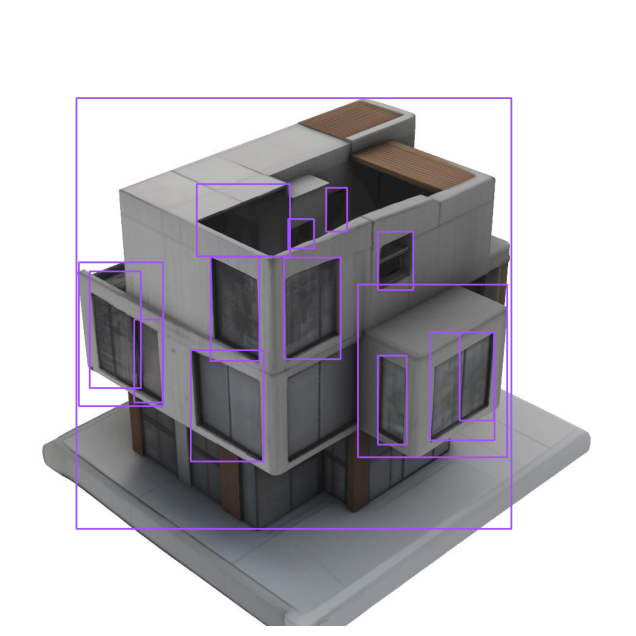

In [ ]:
IMAGE_DIR = "building"
IMAGE_PATH = os.path.join(IMAGE_DIR, random.choice(os.listdir(IMAGE_DIR)))

results = base_model.predict(IMAGE_PATH).with_nms()
results = results[results.confidence > 0.3]

image = cv2.imread(IMAGE_PATH)
mask_annotator = sv.BoxAnnotator()

annotated_image = mask_annotator.annotate(
	image.copy(), detections=results
)

sv.plot_image(image=annotated_image, size=(8, 8))


---
##Combine the results

In [ ]:
def get_bounding_boxes(results):
    """
    Extracts bounding box coordinates from prediction results.

    Args:
        results: Prediction results from the GroundedSAM2 model.

    Returns:
        A list of bounding box coordinates in the format [x1, y1, x2, y2].
    """
    bounding_boxes = []
    for detection in results.xyxy:
      x1, y1, x2, y2 = detection
      bounding_boxes.append([int(x1),int(y1),int(x2),int(y2)])
    return bounding_boxes


In [ ]:
bdbs = get_bounding_boxes(results)

In [ ]:
def create_inclusion_mask(bounding_boxes, max_inclusions=3):
    """
    Creates a mask indicating bounding boxes that include more than max_inclusions other bounding boxes.

    Args:
        bounding_boxes: A list of bounding boxes, each represented as [x1, y1, x2, y2].
        max_inclusions: Maximum number of other bounding boxes a box can include before being masked.
                        Default is 1 (any box including even one other box will be marked True).

    Returns:
        A list of booleans, where True indicates a bounding box includes more boxes than allowed.
    """
    n = len(bounding_boxes)
    mask = [False] * n

    for i in range(n):
        inclusion_count = 0
        x1_i, y1_i, x2_i, y2_i = bounding_boxes[i]

        for j in range(n):
            if i != j:
                x1_j, y1_j, x2_j, y2_j = bounding_boxes[j]

                # Check if bounding box i includes bounding box j
                if x1_i <= x1_j and y1_i <= y1_j and x2_i >= x2_j and y2_i >= y2_j:
                    inclusion_count += 1
                    if inclusion_count > max_inclusions:
                        mask[i] = True
                        break  # No need to count further once we exceed the threshold

    return mask

# Example usage
inclusion_mask = create_inclusion_mask(bdbs, max_inclusions=2)  # Allow each box to include up to 2 others

# Print results
for i, bbox in enumerate(bdbs):
    if inclusion_mask[i]:
        print(f"Bounding box {bbox} includes more than 2 other bounding boxes.")
    else:
        print(f"Bounding box {bbox} includes 2 or fewer other bounding boxes.")

Bounding box [611, 368, 670, 465] includes 2 or fewer other bounding boxes.
Bounding box [455, 411, 549, 580] includes 2 or fewer other bounding boxes.
Bounding box [333, 410, 414, 583] includes 2 or fewer other bounding boxes.
Bounding box [611, 574, 659, 722] includes 2 or fewer other bounding boxes.
Bounding box [698, 535, 805, 715] includes 2 or fewer other bounding boxes.
Bounding box [525, 295, 560, 368] includes 2 or fewer other bounding boxes.
Bounding box [300, 565, 421, 750] includes 2 or fewer other bounding boxes.
Bounding box [114, 419, 254, 658] includes 2 or fewer other bounding boxes.
Bounding box [578, 456, 826, 743] includes more than 2 other bounding boxes.
Bounding box [310, 289, 465, 409] includes 2 or fewer other bounding boxes.
Bounding box [462, 347, 505, 396] includes 2 or fewer other bounding boxes.
Bounding box [747, 535, 804, 682] includes 2 or fewer other bounding boxes.
Bounding box [206, 514, 253, 652] includes 2 or fewer other bounding boxes.
Bounding bo

In [1]:
# Apply the inclusion mask to filter results
filtered_results = results[np.array(inclusion_mask) == False]

# Example visualization using the filtered results:
image = cv2.imread(IMAGE_PATH)
mask_annotator = sv.BoxAnnotator()

annotated_image = mask_annotator.annotate(
	image.copy(), detections=filtered_results
)

sv.plot_image(image=annotated_image, size=(8, 8))

NameError: name 'results' is not defined

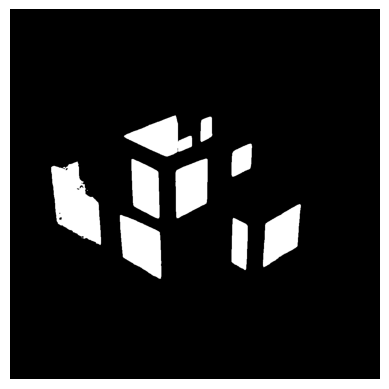

In [ ]:
# Combine masks from filtered results
combined_mask = np.zeros_like(filtered_results.mask[0], dtype=np.uint8)
for mask in filtered_results.mask:
    combined_mask = np.maximum(combined_mask, mask)

# Show the combined mask as an image
show_black_white_image(combined_mask)




---

##Process all images

In [2]:
from autodistill_grounded_sam_2 import GroundedSAM2
from autodistill.detection import CaptionOntology
from autodistill.utils import plot
import numpy as np
import cv2
import os
import random
import supervision as sv
import matplotlib.pyplot as plt


def process_image(image_path, output_dir):
    results = base_model.predict(image_path).with_nms()
    results = results[results.confidence > 0.3]

    image = cv2.imread(image_path)
    mask_annotator = sv.BoxAnnotator()

    annotated_image = mask_annotator.annotate(
        image.copy(), detections=results
    )

    bdbs = get_bounding_boxes(results)
    inclusion_mask = create_inclusion_mask(bdbs, max_inclusions=2)
    filtered_results = results[np.array(inclusion_mask) == False]

    combined_mask = np.zeros_like(filtered_results.mask[0], dtype=np.uint8)
    for mask in filtered_results.mask:
        combined_mask = np.maximum(combined_mask, mask.astype(np.uint8))

    # Extract filename without extension
    filename = os.path.splitext(os.path.basename(image_path))[0]

    # Construct output path in the "output" subfolder
    output_path = os.path.join(output_dir, f"{filename}_combined_mask.png")

    cv2.imwrite(output_path, combined_mask * 255)

    # Save the annotated image
    annotated_output_path = os.path.join(output_dir, f"{filename}_annotated.jpg")
    cv2.imwrite(annotated_output_path, annotated_image)


# Create output directory if it does not exist
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Iterate through all images in the "building" directory
IMAGE_DIR = "building"
for filename in os.listdir(IMAGE_DIR):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image extensions
        image_path = os.path.join(IMAGE_DIR, filename)
        process_image(image_path, output_dir)
        print(f"Processed {filename}")


ModuleNotFoundError: No module named 'autodistill_grounded_sam_2'

In [ ]:
import zipfile
import os

def zip_directory(directory_path, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(directory_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, arcname=os.path.relpath(file_path, directory_path))


# Example usage:
zip_directory("output", "output.zip")

In [ ]:
# prompt: delelte everything in output folder

import shutil
import os

# Define the directory to delete
output_directory = "building"

# Check if the directory exists
if os.path.exists(output_directory):
    # Use shutil.rmtree to delete the directory and its contents
    shutil.rmtree(output_directory)
    print(f"Directory '{output_directory}' and its contents have been deleted.")
else:
    print(f"Directory '{output_directory}' does not exist.")


Directory 'building' and its contents have been deleted.


In [ ]:
files.download('output.zip')